#  Midterm Question 1 Anaylsis 3

In [1]:
import glob                                  # Lib. to open folderd and read its content
import os                                    # Lib. to access os files and execute commands
import email
from email.parser import Parser              # Lib. to read emails and its content
import csv                                   # Lib. to handle CSV files reading and creation
import datetime                              # Lib. to handle datetime function in python
import matplotlib.pyplot as plt              # Lib. to plot graph
from dateutil.parser import parse
import re                                    # Lib. to implement regex to clean data
from nltk.corpus import words                # NLTK corpus to get standard words

In [4]:
with open('midterm\\output\\suspectedUsers.txt','r') as f:          # This file was generated in last analysis and most suspected users were calculated
    suspectedUser = f.read().splitlines()
print(suspectedUser)
#filename = glob.glob('midterm\data\enron\\allen-p\inbox\*')

with open('midterm\\data\\badwords.txt','r') as f1:                 # List of bad and shaddy words calculated mannually
    bad_word_list = f1.read().splitlines()
    

['love-p', 'jones-t', 'shapiro-r', 'meyers-a', 'griffith-j', 'shackleton-s', 'blair-l', 'parks-j', 'hyatt-k', 'dean-c', 'beck-s', 'haedicke-m', 'perlingiere-d', 'giron-d', 'delainey-d', 'steffes-j', 'arnold-j', 'scott-s', 'presto-k', 'schoolcraft-d', 'hain-m', 'mcconnell-m', 'lay-k', 'shankman-j', 'linder-e', 'may-l', 'lewis-a', 'maggi-m', 'solberg-g', 'germany-c', 'sager-e', 'buy-r', 'lenhart-m', 'kaminski-v', 'keavey-p', 'kean-s', 'white-s', 'skilling-j', 'campbell-l', 'taylor-m', 'lavorato-j', 'sanders-r', 'symes-k', 'saibi-e', 'neal-s', 'dasovich-j', 'salisbury-h', 'nemec-g', 'rogers-b', 'fossum-d', 'mann-k', 'thomas-p', 'guzman-m', 'bass-e', 'mims-thurston-p']


In [3]:

for e in suspectedUser:
    print("processing user: "+e)
    userfile = open('midterm\data\enron_created\\'+e+'.txt','w')    #Creating and storing file for each users.
    filename = glob.glob('midterm\data\enron\\'+e+'\sent\*')
    for t in filename:
        headers = Parser().parse(open(t, 'r'))
        userfile.write(headers.get_payload())                     # Method to get email body of each sent text. A per user file
                                                                  # is generated in enron_created folders


processing user: arnold-j
processing user: bass-e
processing user: beck-s
processing user: dasovich-j
processing user: jones-t
processing user: kaminski-v
processing user: lay-k
processing user: mann-k
processing user: nemec-g
processing user: scott-s
processing user: shackleton-s
processing user: skilling-j
processing user: taylor-m


In [5]:
scanList = glob.glob('midterm\data\enron_created\\*')              # files generated in above section are fetched
print(scanList)

user_word_clean =[]                                                 # Clean words from user's sent folder
user_word_required =[]                                              # All raw words from users sent folder
std_words = words.words()                                           # NLTK to get standard word sets
final_frequency ={}                                                 # Dic. to store bad word sentiment index and user


for newUser in scanList:
    print('Processing file:'+newUser)
    frequency = {}                                                  # Dictionary to store word and count
    count =0
    with open(newUser,'r') as f1:
        for line in f1:
            for word in line.split():
                s = re.sub(r'[^\w\s]','',word)
                user_word_clean.append(s.lower())
    for x in user_word_clean:
        if x in std_words:
            user_word_required.append(x)
    for d in user_word_required:                                      #for loop to get count for each word
        if d not in frequency:
            frequency[d]=1
        else:
            frequency[d]=frequency[d]+1                             # Each user file is compared with bad words and respective
    for a,b in frequency.items():                                   # bad sentiment count is calculated and stored in dictionary
        temp_word =a
        if temp_word in bad_word_list:
            count=count+b
    final_frequency.update({newUser:count})
print(final_frequency)
    

['midterm\\data\\enron_created\\arnold-j.txt', 'midterm\\data\\enron_created\\lay-k.txt', 'midterm\\data\\enron_created\\scott-s.txt', 'midterm\\data\\enron_created\\skilling-j.txt']
Processing file:midterm\data\enron_created\arnold-j.txt
Processing file:midterm\data\enron_created\lay-k.txt
Processing file:midterm\data\enron_created\scott-s.txt
Processing file:midterm\data\enron_created\skilling-j.txt
{'midterm\\data\\enron_created\\lay-k.txt': 13393, 'midterm\\data\\enron_created\\arnold-j.txt': 5309, 'midterm\\data\\enron_created\\scott-s.txt': 27356, 'midterm\\data\\enron_created\\skilling-j.txt': 43399}


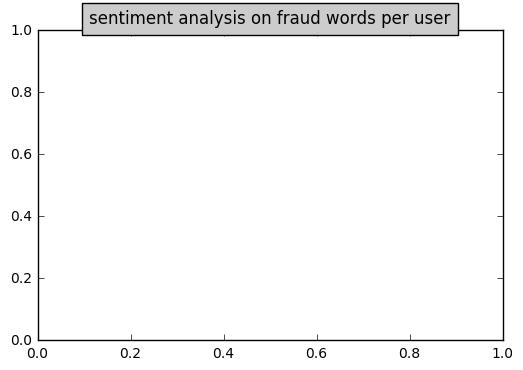

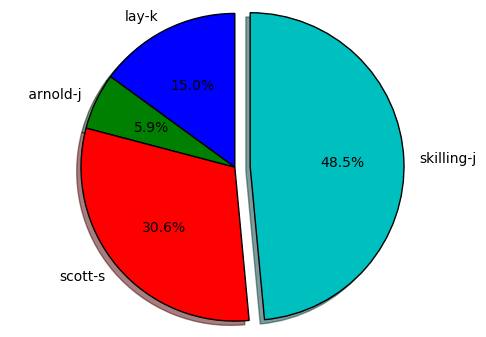

In [22]:
import matplotlib.pyplot as plt                 # A pie chart for top 4 suspected users and their sentiment count is plotted
from pylab import *

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
title('sentiment analysis on fraud words per user', bbox={'facecolor':'0.8', 'pad':5})
labels = 'lay-k', ' arnold-j', 'scott-s', 'skilling-j'
sizes = [13393,  5309, 27356, 43399]
explode = (0, 0,0,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()